# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Customer_Churn_Analysis.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#most of the data is in oobject types. We have to convert this into integer/Float for further analysis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Lets check the unique values
print("Distinct values of each column")
for column in df:
    print(f'- {column}: {df[column].unique()}')

Distinct values of each column
- customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
- gender: ['Female' 'Male']
- SeniorCitizen: [0 1]
- Partner: ['Yes' 'No']
- Dependents: ['No' 'Yes']
- tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
- PhoneService: ['No' 'Yes']
- MultipleLines: ['No phone service' 'No' 'Yes']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['No' 'Yes' 'No internet service']
- StreamingTV: ['No' 'Yes' 'No internet service']
- StreamingMovies: ['No' 'Yes' 'No internet service']
- Contract: ['Month-to-month' 'One year' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMe

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Exploratory data analysis for better understaning & cleaning the data

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

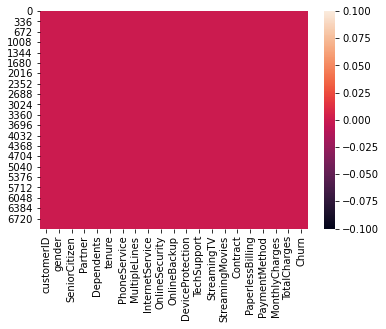

In [7]:
sns.heatmap(df.isnull())

No Null Value found

<AxesSubplot:xlabel='gender', ylabel='count'>

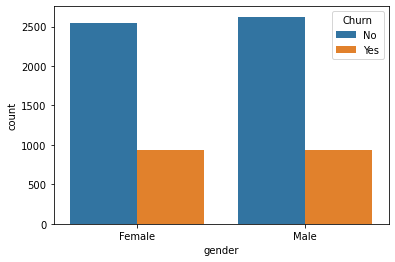

In [8]:
sns.countplot(x='gender',hue='Churn',data=df)

Male and fenale have the same churn ratio. 

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

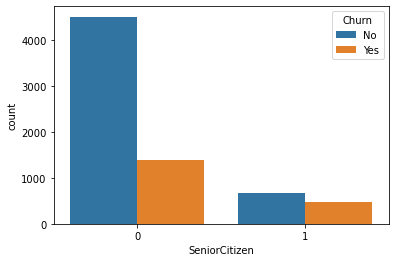

In [9]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

Senior citizens are less prone to leave in comparison to young citizens

<AxesSubplot:xlabel='Partner', ylabel='count'>

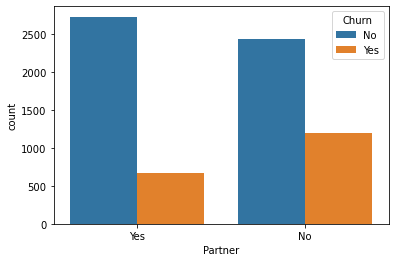

In [10]:
sns.countplot(x='Partner',hue='Churn',data=df)

those which dont have partners are more prone to move.

<AxesSubplot:xlabel='Contract', ylabel='count'>

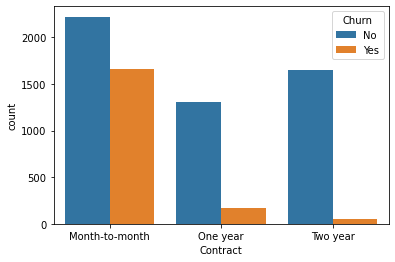

In [11]:
sns.countplot(x='Contract',hue='Churn',data=df)

#Those who have month to month contract are more to chrun thn one year and two year contract.

<AxesSubplot:xlabel='tenure', ylabel='count'>

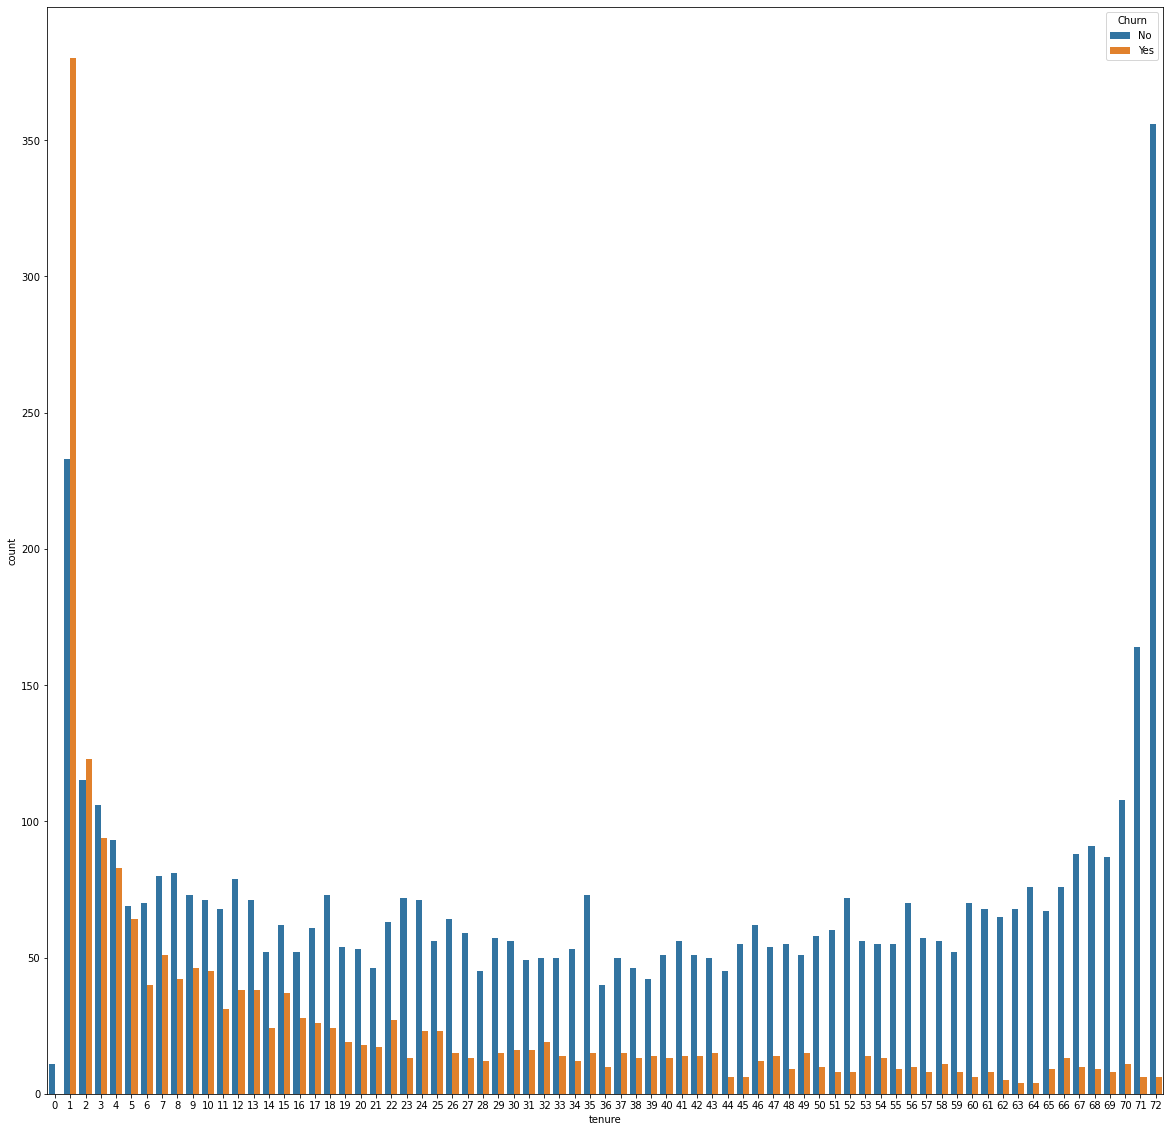

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='tenure',hue='Churn',data=df)

Those which have less tennure are more prone to leave in comparison to those have long tennure

<AxesSubplot:xlabel='InternetService', ylabel='count'>

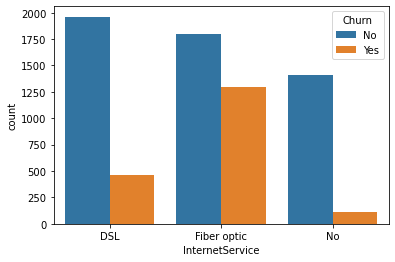

In [13]:
sns.countplot(x='InternetService',hue='Churn',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

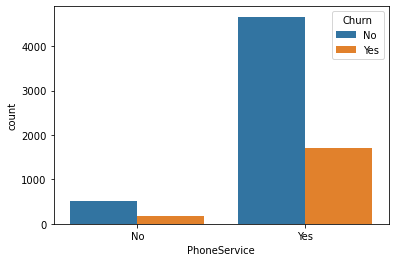

In [14]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

those are getting have more numbers of customer who leaves or moves in comparison those who are not getting phone services

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

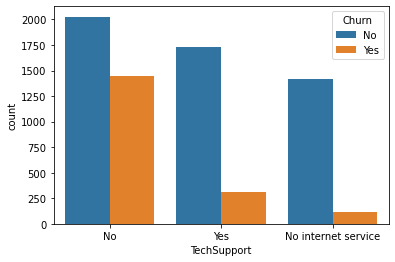

In [15]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

no tech support means high level of churn rate

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

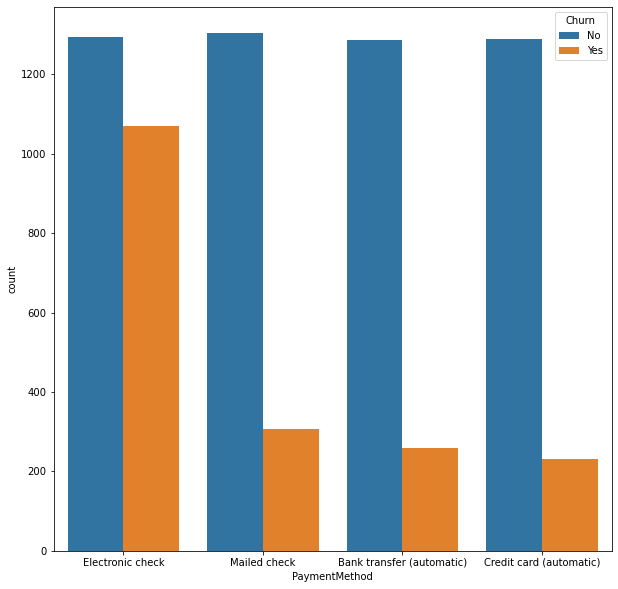

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

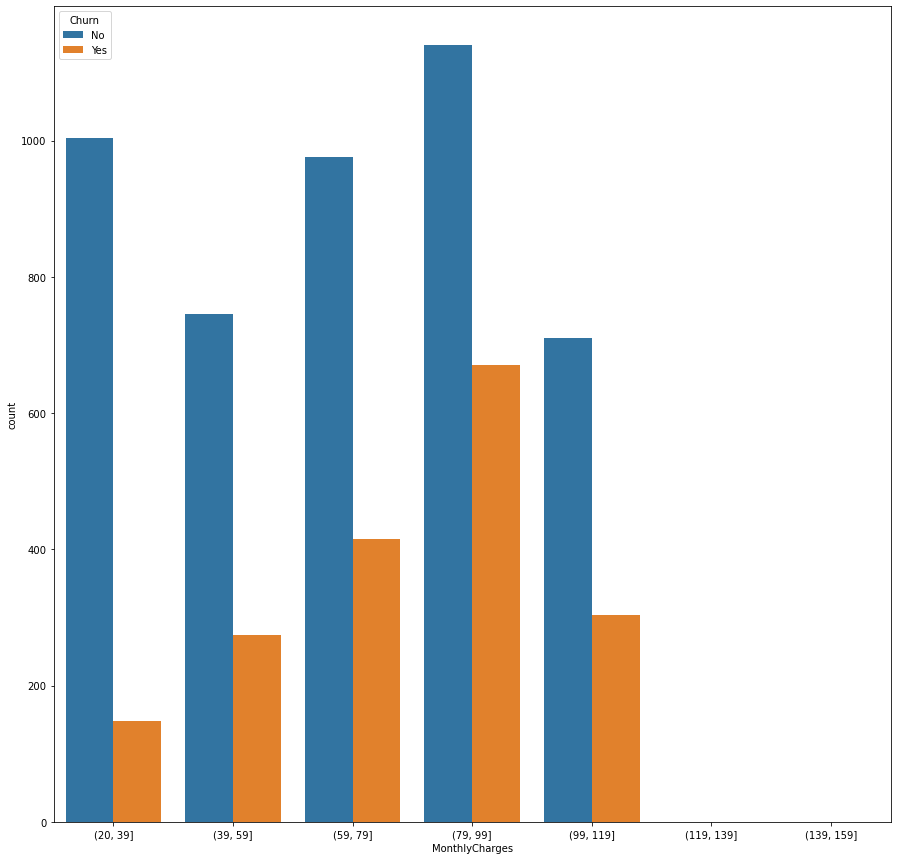

In [17]:
f, ax = plt.subplots(figsize=(15, 15))
df1 = pd.cut(x=df['MonthlyCharges'], bins=[20, 39, 59, 79,99,119,139,159])
sns.countplot(x=df1,hue=df['Churn'])

monthly charges of 79-99 have high rate of churn.  

In [18]:
tc = pd.to_numeric(df.TotalCharges,errors='coerce')
df[tc.isnull()][['TotalCharges']]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [19]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

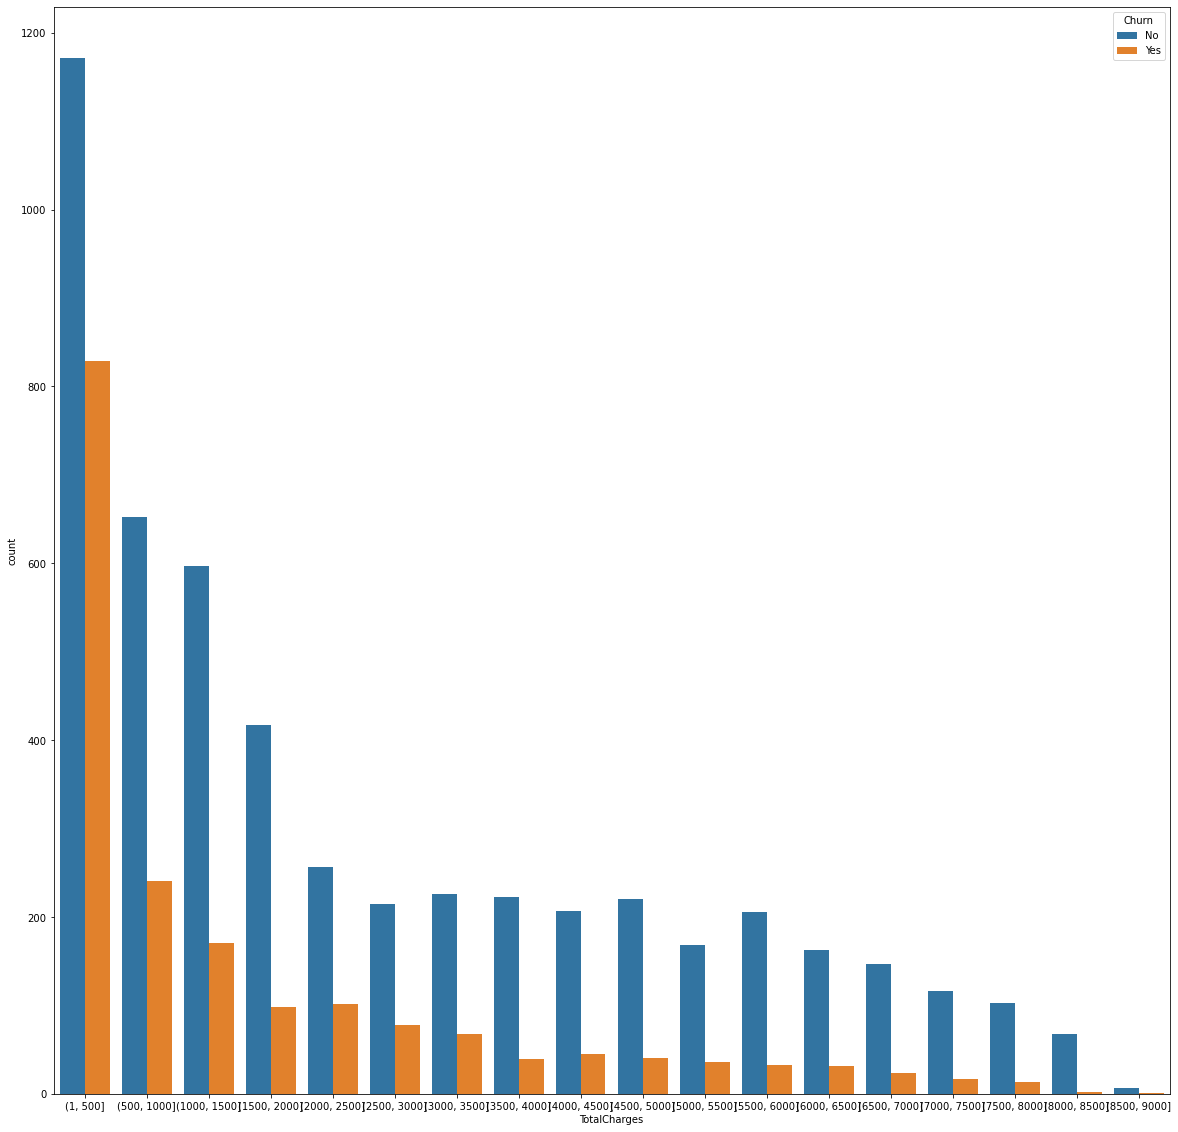

In [20]:
f, ax = plt.subplots(figsize=(20, 20))
df1 = pd.cut(x=df['TotalCharges'], bins=[1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000])
sns.countplot(x=df1,hue=df['Churn'])

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
#lets drop some unnecessary columns
df.drop("customerID",axis=1,inplace=True)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
#Lets Check the skewness and remove them
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

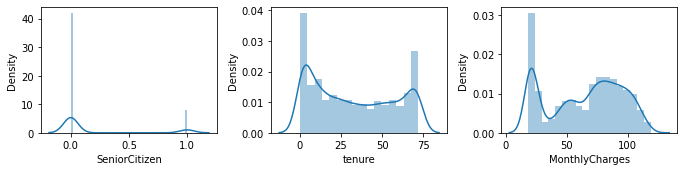

In [25]:
collist=("SeniorCitizen","tenure","MonthlyCharges")
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [26]:
import numpy as np
skew=("SeniorCitizen","tenure","MonthlyCharges")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [27]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [28]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"].astype(str))
df["Partner"]=le.fit_transform(df["Partner"].astype(str))
df["Dependents"]=le.fit_transform(df["Dependents"].astype(str))
df["PhoneService"]=le.fit_transform(df["PhoneService"].astype(str))
df["MultipleLines"]=le.fit_transform(df["MultipleLines"].astype(str))
df["InternetService"]=le.fit_transform(df["InternetService"].astype(str))
df["OnlineSecurity"]=le.fit_transform(df["OnlineSecurity"].astype(str))
df["OnlineBackup"]=le.fit_transform(df["OnlineBackup"].astype(str))
df["DeviceProtection"]=le.fit_transform(df["DeviceProtection"].astype(str))
df["TechSupport"]=le.fit_transform(df["TechSupport"].astype(str))
df["StreamingTV"]=le.fit_transform(df["StreamingTV"].astype(str))
df["StreamingMovies"]=le.fit_transform(df["StreamingMovies"].astype(str))
df["Contract"]=le.fit_transform(df["Contract"].astype(str))
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"].astype(str))
df["PaymentMethod"]=le.fit_transform(df["PaymentMethod"].astype(str))
df["Churn"]=le.fit_transform(df["Churn"].astype(str))

In [29]:
df.dtypes

gender                int32
SeniorCitizen       float64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

gender                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
SeniorCitizen       AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Partner             AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Dependents          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
tenure              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
PhoneService        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
MultipleLines       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineBackup        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
DeviceProtection    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
TechSupport         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
StreamingTV         AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
StreamingMovies     AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Contract            

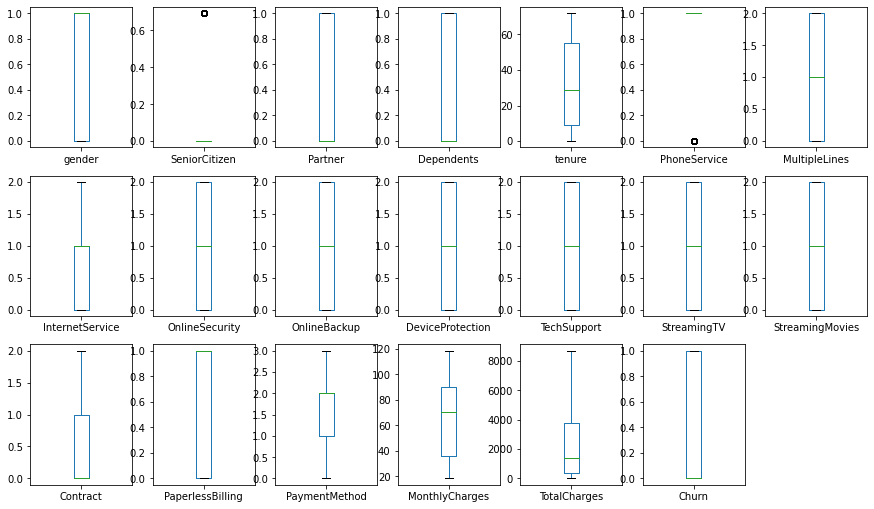

In [30]:
#Checking outliers
df.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

In [31]:
#Identifying outliers and removing them 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.00955867, 0.43991649, 1.03453023, ..., 1.16032292, 0.99261052,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.25962894, 0.17216471,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.36266036, 0.9580659 ,
        1.66382851],
       ...,
       [1.00955867, 0.43991649, 1.03453023, ..., 1.1686319 , 0.85293201,
        0.60102348],
       [0.99053183, 2.27315869, 1.03453023, ..., 0.32033821, 0.87051315,
        1.66382851],
       [0.99053183, 0.43991649, 0.96662231, ..., 1.35896134, 2.01389665,
        0.60102348]])

In [32]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [33]:
df=df[(z<3).all(axis=1)]

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0.000000,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.000000,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0.000000,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0.000000,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0.000000,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0.000000,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0.000000,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0.000000,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,0.693147,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [35]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.0,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000
mean,0.503694,0.113109,0.485930,0.299324,32.439082,1.0,0.934130,0.966515,0.785726,0.913378,0.905518,0.791699,1.001415,1.005188,0.691086,0.594875,1.572866,67.199041,2363.759432,0.267096
std,0.500026,0.256160,0.499841,0.457998,24.595120,0.0,0.997907,0.715712,0.845162,0.867592,0.866771,0.846655,0.871905,0.871891,0.834212,0.490955,1.068744,30.449604,2328.880553,0.442478
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.750000,413.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.700000,1417.900000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,91.250000,4024.200000,1.000000
max,1.000000,0.693147,1.000000,1.000000,72.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [36]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.006666,-0.003095,0.015081,0.000705,NaN,-0.007232,0.001883,-0.016543,-0.009229,-0.003004,-0.009510,-0.005602,-0.002749,-0.000091,-0.018561,0.023108,-0.013267,-0.000946,-0.011212
SeniorCitizen,-0.006666,1.000000,0.014985,-0.212450,0.018998,NaN,0.153645,-0.040567,-0.123628,-0.020639,-0.023526,-0.144616,0.028561,0.047145,-0.139921,0.155571,-0.043247,0.239209,0.110449,0.148802
Partner,-0.003095,0.014985,1.000000,0.454535,0.385531,NaN,0.150238,-0.006811,0.151603,0.155452,0.168046,0.132586,0.134436,0.128787,0.299346,-0.009456,-0.150912,0.091645,0.320005,-0.154692
Dependents,0.015081,-0.212450,0.454535,1.000000,0.161524,NaN,-0.026347,0.051687,0.146629,0.090982,0.083529,0.130405,0.049732,0.024854,0.243697,-0.106037,-0.039747,-0.129008,0.057918,-0.159481
tenure,0.000705,0.018998,0.385531,0.161524,1.000000,NaN,0.360691,-0.038332,0.326014,0.377266,0.367755,0.324150,0.283530,0.293767,0.675544,0.003627,-0.364802,0.245389,0.830108,-0.349681
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,-0.007232,0.153645,0.150238,-0.026347,0.360691,NaN,1.000000,-0.109861,0.007312,0.125802,0.130775,0.011859,0.188227,0.194299,0.116643,0.174347,-0.186049,0.456223,0.466008,0.040207
InternetService,0.001883,-0.040567,-0.006811,0.051687,-0.038332,NaN,-0.109861,1.000000,-0.026160,0.031031,0.050406,-0.021632,0.099601,0.094262,0.112766,-0.165694,0.100110,-0.472724,-0.243989,-0.059137
OnlineSecurity,-0.016543,-0.123628,0.151603,0.146629,0.326014,NaN,0.007312,-0.026160,1.000000,0.199192,0.174330,0.284134,0.047993,0.063601,0.367511,-0.155053,-0.089331,-0.072293,0.254626,-0.290086
OnlineBackup,-0.009229,-0.020639,0.155452,0.090982,0.377266,NaN,0.125802,0.031031,0.199192,1.000000,0.196737,0.211105,0.152935,0.140898,0.286501,-0.020016,-0.126560,0.109520,0.381602,-0.202671


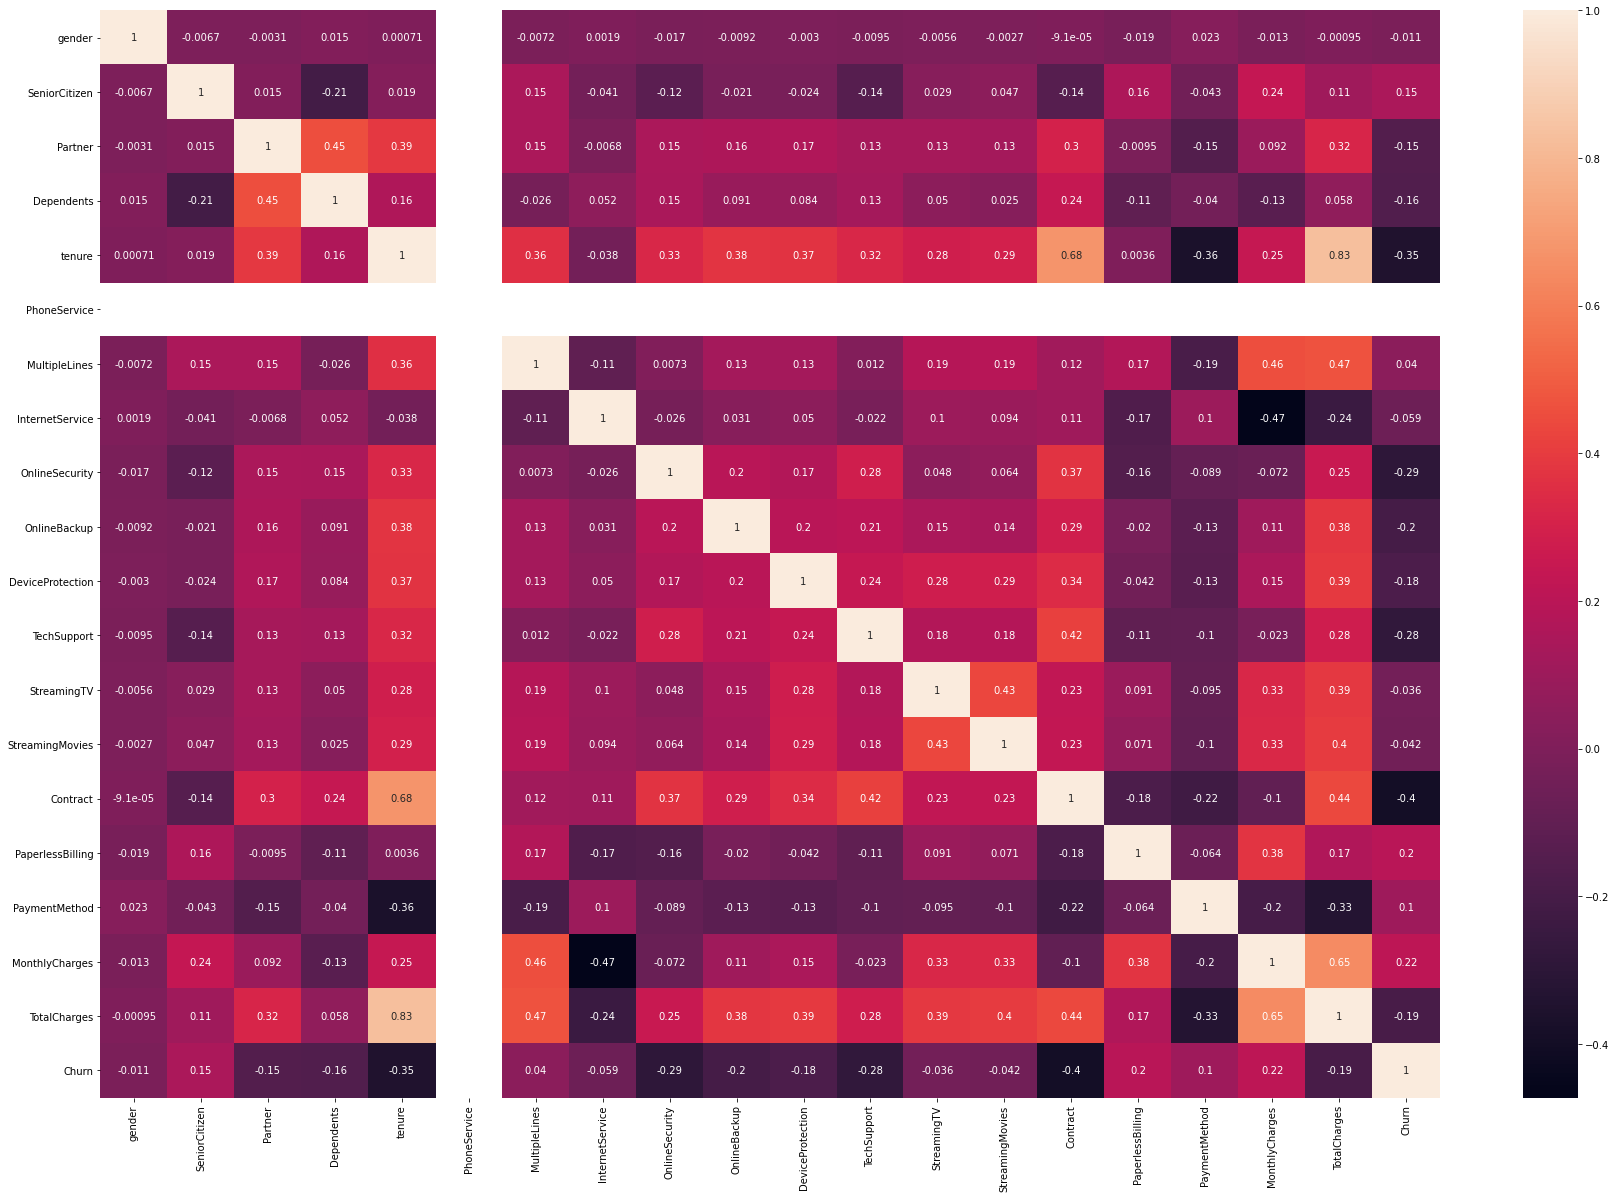

In [37]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
df.shape

(6361, 20)

# Lets now find out the prediction of the frauds by using different Classification models

In [39]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [40]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0.000000,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0.000000,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,0,0.000000,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0.000000,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
6,1,0.000000,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0.000000,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40
7038,1,0.000000,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0.000000,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7041,1,0.693147,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [41]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [42]:
#lets use PCA to combine columns those have high multicolinerality
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-474.297745,-8.105585,2.416173,-0.508422,1.435034,1.582276,-0.198173,1.145287,-1.517510,1.043702
1,-2255.822320,9.762166,-7.193928,-0.843229,0.984629,1.613517,0.875430,-1.071237,0.099727,1.036067
2,-2212.183508,24.806562,-0.387012,-1.057866,0.343817,0.300495,-0.714170,0.061383,-0.056883,-0.119448
3,-1543.084581,45.772670,9.812017,1.783594,-0.098853,-1.212288,0.222070,0.599498,-0.841767,0.272442
4,-414.235002,25.872542,4.852330,-0.536177,-0.318345,-0.951739,0.682323,-1.497365,0.405530,-0.088579
...,...,...,...,...,...,...,...,...,...,...
6356,-944.331553,-55.012282,26.742877,0.148956,-0.985127,0.016253,-0.888948,-0.319508,0.095940,0.084425
6357,-373.156181,20.941452,4.288643,2.298497,0.551414,0.738949,1.499822,1.810516,-0.033249,0.100017
6358,4999.421333,-3.779613,-6.542071,-0.024847,0.284690,-1.475903,-0.760390,-0.857970,-0.672268,0.111211
6359,-2057.195880,26.699298,1.239705,-0.937998,1.438698,-0.779957,0.816683,0.462556,-0.084450,-0.244822


In [43]:
#lets use standard scale to bring data closer to mean.
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.20366   , -0.31929581,  0.26396509, ...,  1.47417434,
        -2.06950473,  1.4792521 ],
       [-0.96863368,  0.38455198, -0.78593112, ..., -1.37885926,
         0.13600237,  1.46843064],
       [-0.94989549,  0.97718199, -0.04228079, ...,  0.07900976,
        -0.07757371, -0.16929572],
       ...,
       [ 2.14671513, -0.14888679, -0.7147162 , ..., -1.10434933,
        -0.91680614,  0.15762109],
       [-0.88334494,  1.05174076,  0.13543678, ...,  0.59538629,
        -0.11516908, -0.34698965],
       [ 1.92412075,  0.11637367, -0.53743108, ...,  1.83172992,
         0.2986264 ,  0.39741446]])

In [44]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.203660,-0.319296,0.263965,-0.491443,1.460425,1.745856,-0.242383,1.474174,-2.069505,1.479252
1,-0.968634,0.384552,-0.785931,-0.815069,1.002051,1.780327,1.070730,-1.378859,0.136002,1.468431
2,-0.949895,0.977182,-0.042281,-1.022538,0.349901,0.331561,-0.873495,0.079010,-0.077574,-0.169296
3,-0.662589,1.803080,1.071955,1.724030,-0.100602,-1.337617,0.271612,0.771654,-1.147960,0.386136
4,-0.177869,1.019173,0.530113,-0.518271,-0.323978,-1.050132,0.834543,-1.927357,0.553042,-0.125544
...,...,...,...,...,...,...,...,...,...,...
6356,-0.405489,-2.167048,2.921639,0.143982,-1.002557,0.017933,-1.087264,-0.411260,0.130839,0.119656
6357,-0.160231,0.824927,0.468531,2.221738,0.561171,0.815343,1.834419,2.330434,-0.045343,0.141755
6358,2.146715,-0.148887,-0.714716,-0.024017,0.289727,-1.628486,-0.930026,-1.104349,-0.916806,0.157621
6359,-0.883345,1.051741,0.135437,-0.906673,1.464154,-0.860591,0.998877,0.595386,-0.115169,-0.346990


In [45]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [46]:
y.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [47]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\admin\anaconda3\lib\site-packages (0.8.1)


In [48]:
#Lets use SMOTE to remove the imbalance
from imblearn.over_sampling import SMOTE

In [49]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [50]:
np.bincount(y)

array([4662, 1699], dtype=int64)

In [51]:
trainx.value_counts()

0          1          2          3          4          5          6          7          8          9        
-1.006522  -0.781117  -2.360024   0.833538   0.445589  -0.221450   0.064939  -0.220402  -0.022117   0.171511    4
-0.995481   0.122788  -1.187303  -1.238117   1.252992   0.262313  -0.796720   0.442532  -0.072500  -0.500099    4
-0.985002   0.978108  -0.075321  -1.010079   0.341851   0.313088  -0.866221   0.086211  -0.085324  -0.185556    4
-1.006652  -0.791716  -2.373695   0.832799   0.426050  -0.219544   0.084234  -0.224633  -0.013644   0.187083    3
-0.995654   0.108286  -1.203451  -1.476052   0.276366   0.189240  -0.834332   0.450002  -0.056046  -0.408969    3
                                                                                                               ..
 0.007711   1.054420   0.599661   0.374738   0.418680  -0.851826   0.928954  -1.313917  -1.944310   0.096119    1
 0.007652   0.085608   0.141793  -2.146936  -0.853401  -0.067367  -1.846502   0.133535   0.11

In [52]:
trainy.value_counts()

1    4662
0    4662
Name: Churn, dtype: int64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [54]:
LG=LogisticRegression()

In [55]:
LG.fit(x_train,y_train)

LogisticRegression()

In [56]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.7741243745532523
[[1049  339]
 [ 293 1117]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1388
           1       0.77      0.79      0.78      1410

    accuracy                           0.77      2798
   macro avg       0.77      0.77      0.77      2798
weighted avg       0.77      0.77      0.77      2798



In [57]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7827019299499642
[[1040  348]
 [ 260 1150]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1388
           1       0.77      0.82      0.79      1410

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



In [58]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7823445318084346
[[1027  361]
 [ 248 1162]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1388
           1       0.76      0.82      0.79      1410

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



In [59]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7498213009292352
[[1010  378]
 [ 322 1088]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1388
           1       0.74      0.77      0.76      1410

    accuracy                           0.75      2798
   macro avg       0.75      0.75      0.75      2798
weighted avg       0.75      0.75      0.75      2798



In [60]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7730521801286633
[[ 970  418]
 [ 217 1193]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1388
           1       0.74      0.85      0.79      1410

    accuracy                           0.77      2798
   macro avg       0.78      0.77      0.77      2798
weighted avg       0.78      0.77      0.77      2798



In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8145103645461044
[[1103  285]
 [ 234 1176]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1388
           1       0.80      0.83      0.82      1410

    accuracy                           0.81      2798
   macro avg       0.81      0.81      0.81      2798
weighted avg       0.81      0.81      0.81      2798



In [62]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7612580414581844
[[1044  344]
 [ 324 1086]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1388
           1       0.76      0.77      0.76      1410

    accuracy                           0.76      2798
   macro avg       0.76      0.76      0.76      2798
weighted avg       0.76      0.76      0.76      2798



In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.7787705503931379
[[1049  339]
 [ 280 1130]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1388
           1       0.77      0.80      0.78      1410

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



In [64]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80597015 0.80581761 0.79245283 0.80031447 0.7995283 ]
0.8008166713601803
0.004968574607817815


In [65]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7965436  0.79559748 0.78852201 0.7908805  0.80267296]
0.7948433107550628
0.004907662433335241


In [66]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72113119 0.73663522 0.7091195  0.72641509 0.73427673]
0.725515545410979
0.009892094984187378


In [67]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7761194  0.76493711 0.74371069 0.77358491 0.7822327 ]
0.7681169623580212
0.013408722201736173


In [68]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80361351 0.79402516 0.76415094 0.80188679 0.78852201]
0.7904396834101587
0.014228260501963427


In [69]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80989788 0.79795597 0.78066038 0.80581761 0.79402516]
0.7976713997045557
0.010184286801040646


In [70]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80282797 0.78066038 0.76100629 0.78694969 0.79009434]
0.7843077314519755
0.01370929772221582


We can see that the Random forest classifier is giving the best results 81% with the cross validation score (78%) so we are proceeding the same for the prediction.

In [71]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [72]:
y_pred_prob=rf.predict_proba(x_test)[:,-1]

In [73]:
y_pred_prob

array([0.96, 0.88, 1.  , ..., 0.96, 0.83, 0.28])

In [74]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [75]:
fpr

array([0.        , 0.00288184, 0.00288184, 0.00504323, 0.00504323,
       0.00504323, 0.00504323, 0.00720461, 0.00720461, 0.00936599,
       0.01008646, 0.01008646, 0.0129683 , 0.0129683 , 0.01585014,
       0.01585014, 0.01873199, 0.02377522, 0.0259366 , 0.02737752,
       0.03097983, 0.03097983, 0.03170029, 0.03242075, 0.03458213,
       0.03674352, 0.03746398, 0.04034582, 0.04106628, 0.04106628,
       0.04394813, 0.04610951, 0.04971182, 0.05403458, 0.05403458,
       0.05979827, 0.06340058, 0.06628242, 0.06700288, 0.06700288,
       0.07060519, 0.07420749, 0.07420749, 0.07492795, 0.07925072,
       0.07997118, 0.08069164, 0.08429395, 0.09005764, 0.09005764,
       0.09221902, 0.09293948, 0.09293948, 0.09726225, 0.09870317,
       0.10662824, 0.11167147, 0.11599424, 0.11959654, 0.12608069,
       0.13184438, 0.13760807, 0.13760807, 0.13832853, 0.14409222,
       0.14913545, 0.15345821, 0.15634006, 0.15634006, 0.15706052,
       0.16282421, 0.16282421, 0.16714697, 0.1685879 , 0.16930

In [76]:
tpr

array([0.        , 0.05744681, 0.05815603, 0.10141844, 0.10212766,
       0.10425532, 0.10496454, 0.14255319, 0.14397163, 0.18794326,
       0.18794326, 0.18865248, 0.2248227 , 0.22695035, 0.25319149,
       0.25390071, 0.28439716, 0.3141844 , 0.3141844 , 0.33900709,
       0.35460993, 0.35531915, 0.37659574, 0.37659574, 0.4035461 ,
       0.42765957, 0.42765957, 0.44680851, 0.44680851, 0.44751773,
       0.46170213, 0.47659574, 0.49078014, 0.50851064, 0.50921986,
       0.52553191, 0.54255319, 0.55390071, 0.55390071, 0.55460993,
       0.57659574, 0.58723404, 0.58794326, 0.58794326, 0.59929078,
       0.61560284, 0.61560284, 0.62836879, 0.63971631, 0.64042553,
       0.64822695, 0.64822695, 0.64893617, 0.65815603, 0.65815603,
       0.66595745, 0.67375887, 0.68297872, 0.69219858, 0.69858156,
       0.70851064, 0.71985816, 0.72056738, 0.72056738, 0.73262411,
       0.74468085, 0.75248227, 0.75744681, 0.75815603, 0.75815603,
       0.76808511, 0.76879433, 0.77730496, 0.78510638, 0.78510

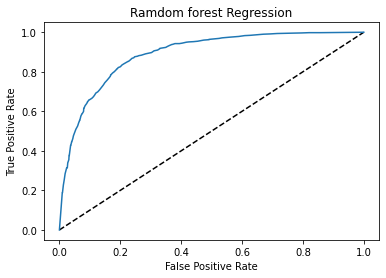

In [77]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Ramdom forest Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ramdom forest Regression")
plt.show()

# Saving the model

In [78]:
import pickle
filename='CustomerChurnanalysis.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 0])